# **SDA Mini Project**

> #### 60191684 전성민
> #### 60213026 강한결
> #### 60231181 서예승
> #### 60231211 김태훈

## **1. 문제 정의**

### ㆍData Science 관련 종사자들의 2020~2022 Salary 분석

## **2. EDA (Exploratory Data Analysis) and Data Preprocessing**

In [371]:
# 데이터를 가져와 읽고, head 출력
import pandas as pd
data=pd.read_csv('Data_Science_Fields_Salary_Categorization.csv', index_col=0)
data

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
...,...,...,...,...,...,...,...,...,...
603,2022,Data Engineer,SE,FT,"12,253,703.00",US,US,M,100
604,2022,Data Engineer,SE,FT,"10,025,757.00",US,US,M,100
605,2022,Data Analyst,SE,FT,"10,264,466.00",US,US,M,0
606,2022,Data Analyst,SE,FT,"11,935,425.00",US,US,M,100


#### Dimension Description

| Dimension             | Description                                                                                           |
|-----------------------|-------------------------------------------------------------------------------------------------------|
| Working Year          | The year the salary was paid (2020, 2021, 2022)                                                       |
| Designation           | The role worked in during the year                                                                     |
| Experience            | The experience level in the job during the year. [EN - Entry level / Junior, MI - Mid level / Intermediate, SE - Senior level / Expert, EX - Executive level / Director] |
| Employment Status     | The type of employment for the role. [PT - Part time, FT - Full time, CT - Contract, FL - Freelance]   |
| Salary In Rupees      | The total gross salary amount paid.                                                                   |
| Employee Location     | Employee's primary country of residence during the work year as an ISO 3166 country code. (PFB Link to ISO 3166 country code) |
| Company Location      | The country of the employer's main office or contracting branch.                                       |
| Company Size          | The median number of people that worked for the company during the year. [S(small) - Less than 50 employees, M(medium) - 50 to 250 employees, L(large) - More than 250 employees] |
| Remote Working Ratio  | The overall amount of work done remotely. [0 - No Remote Work (less than 20%), 50 - Partially Remote, 100 - Fully Remote (more than 80%)] |


In [374]:
# 데이터의 타입을 확인
data.dtypes

Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees        object
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object

In [376]:
# Designation(직책)의 종류를 확인
data['Designation'].value_counts().head(10)

Designation
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64

In [378]:
# (Data Engineer, Big Data Engineer), (Machine Learning Engineer, ML Engineer) 같이 비슷한 직책을 그룹화
# *그룹화를 위해 ChatGPT를 이용*

# 그룹화 기준 정의
group_mapping = {
    "Data Engineer": [
        "Data Engineer", "Big Data Engineer", "Cloud Data Engineer", "Lead Data Engineer", 
        "Principal Data Engineer", "Data Engineering Manager", "ETL Developer", "Data Architect", 
        "Big Data Architect"
    ],
    "Data Scientist": [
        "Data Scientist", "Applied Data Scientist", "Principal Data Scientist", "Staff Data Scientist", 
        "Research Scientist", "AI Scientist", "Director of Data Science", "Head of Data Science", 
        "Data Science Manager", "Data Science Consultant", "Data Science Engineer"
    ],
    "Machine Learning Engineer": [
        "Machine Learning Engineer", "ML Engineer", "Machine Learning Developer", 
        "Machine Learning Scientist", "Applied Machine Learning Scientist", "Lead Machine Learning Engineer", 
        "Machine Learning Infrastructure Engineer", "Head of Machine Learning", "Machine Learning Manager", 
        "NLP Engineer"
    ],
    "Data Analyst": [
        "Data Analyst", "Business Data Analyst", "BI Data Analyst", "Financial Data Analyst", 
        "Marketing Data Analyst", "Product Data Analyst", "Lead Data Analyst", 
        "Principal Data Analyst", "Data Specialist", "Data Analytics Manager", 
        "Data Analytics Engineer", "Data Analytics Lead", "Analytics Engineer"
    ],
    "Computer Vision Engineer": [
        "Computer Vision Engineer", "3D Computer Vision Researcher", "Computer Vision Software Engineer"
    ]
}

# 직책을 그룹화
def map_designation(designation):
    for group, titles in group_mapping.items():
        if designation in titles:
            return group
    return 'Other'

# 그룹 컬럼 추가
data['Group'] = data['Designation'].apply(map_designation)
data['Group'].value_counts()

Group
Data Scientist               212
Data Engineer                170
Data Analyst                 135
Machine Learning Engineer     69
Other                         11
Computer Vision Engineer      10
Name: count, dtype: int64

In [379]:
# 데이터의 결측치 확인
data.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Salary_In_Rupees        0
Employee_Location       0
Company_Location        0
Company_Size            0
Remote_Working_Ratio    0
Group                   0
dtype: int64

In [382]:
# 직책 그룹이 Other인 data를 제거
data=data[data['Group'] != 'Other']

In [384]:
# object 타입인 salary를 float으로 변경
data_copy=data.copy()
data_copy['Salary_In_Rupees']=data['Salary_In_Rupees'].replace(',', '', regex=True).astype(float)

# Salary의 기준을 Rupee에서 Won(백만단위)으로 변경
data_copy['Salary_Million_Won']=(data_copy['Salary_In_Rupees']*16.5/1000000).astype(int)

In [386]:
# 사용할 데이터를 정리
data=data_copy[['Working_Year','Experience','Employment_Status',
           'Employee_Location','Company_Location','Company_Size',
           'Remote_Working_Ratio','Group','Salary_Million_Won']]
data.head(5)

,Working_Year,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Group,Salary_Million_Won
1,2020,MI,FT,DE,DE,L,0,Data Scientist,104
2,2020,SE,FT,JP,JP,S,0,Machine Learning Engineer,341
3,2020,SE,FT,GB,GB,M,50,Data Engineer,143
4,2020,MI,FT,HN,HN,S,0,Data Analyst,26
5,2020,SE,FT,US,US,L,50,Machine Learning Engineer,196


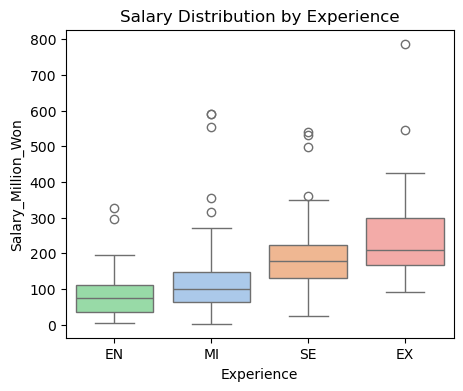

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

# Experience에 따른 Salary 분포 확인
plt.figure(figsize=(5,4))
sns.boxplot(x=data['Experience'], y=data['Salary_Million_Won'], 
            hue=data['Experience'], order=['EN','MI','SE','EX'], palette='pastel')
plt.title('Salary Distribution by Experience')
plt.show()

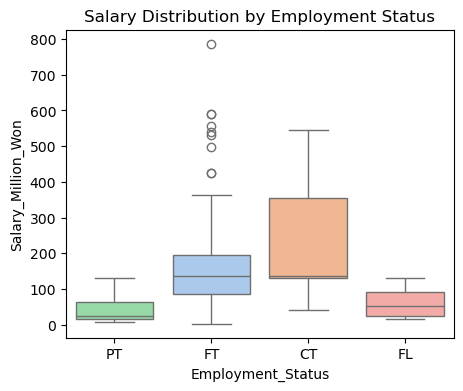

In [389]:
# Employment Status에 따른 Salary 분포 확인
plt.figure(figsize=(5,4))
sns.boxplot(x=data['Employment_Status'], y=data['Salary_Million_Won'], 
            hue=data['Employment_Status'], order=['PT','FT','CT','FL'], palette='pastel')
plt.title('Salary Distribution by Employment Status')
plt.show()

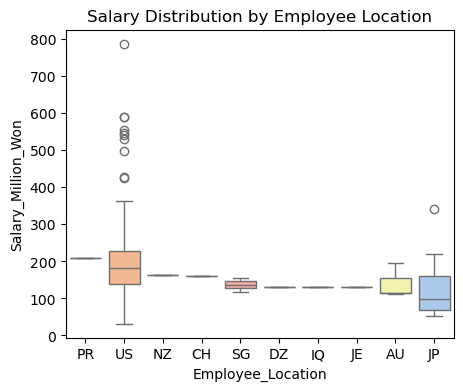

In [390]:
# 평균임금을 기준으로 상위 10개 Employee Location을 추출
top_10_locations=data.groupby('Employee_Location')['Salary_Million_Won'].mean().sort_values(ascending=False).head(10).index
top_10_data = data[data['Employee_Location'].isin(top_10_locations)]

# boxplot 정렬을 위해 median으로 sort
grouped = top_10_data.loc[:,['Employee_Location', 'Salary_Million_Won']].groupby(['Employee_Location']) \
                .median().sort_values(by='Salary_Million_Won', ascending=False)

# 상위 10개의 Employee Location에 따른 Salary 분포 확인
plt.figure(figsize=(5,4))
sns.boxplot(x=top_10_data['Employee_Location'], y=top_10_data['Salary_Million_Won'], 
            hue=top_10_data['Employee_Location'], order=grouped.index, palette='pastel')
plt.title('Salary Distribution by Employee Location')
plt.show()

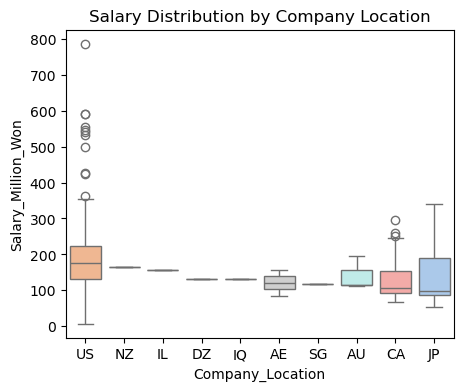

In [392]:
# 평균임금을 기준으로 상위 10개 Company Location을 추출
top_10_locations=data.groupby('Company_Location')['Salary_Million_Won'].mean().sort_values(ascending=False).head(10).index
top_10_data = data[data['Company_Location'].isin(top_10_locations)]

# boxplot 정렬을 위해 median으로 sort
grouped = top_10_data.loc[:,['Company_Location', 'Salary_Million_Won']].groupby(['Company_Location']) \
                .median().sort_values(by='Salary_Million_Won', ascending=False)

# 상위 10개의 Company Location에 따른 Salary 분포 확인
plt.figure(figsize=(5,4))
sns.boxplot(x=top_10_data['Company_Location'], y=top_10_data['Salary_Million_Won'], 
            hue=top_10_data['Company_Location'], order=grouped.index, palette='pastel')
plt.title('Salary Distribution by Company Location')
plt.show()

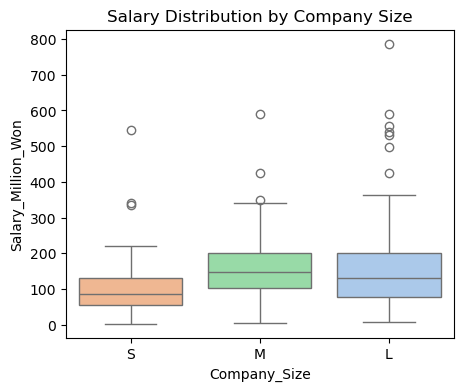

In [394]:
# Company Size에 따른 Salary 분포 확인
plt.figure(figsize=(5,4))
sns.boxplot(x=data['Company_Size'], y=data['Salary_Million_Won'], 
            hue=data['Company_Size'], order=['S','M','L'], palette='pastel')
plt.title('Salary Distribution by Company Size')
plt.show()

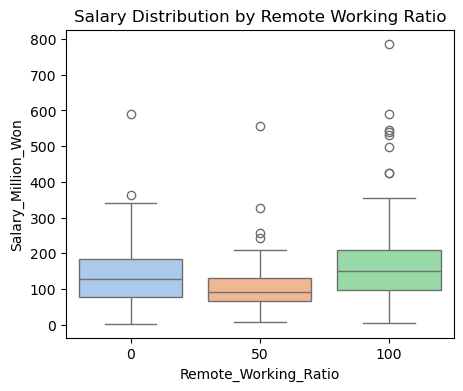

In [402]:
# Remote Working Ratio에 따른 Salary 분포 확인
plt.figure(figsize=(5,4))
sns.boxplot(x=data['Remote_Working_Ratio'], y=data['Salary_Million_Won'], 
            hue=data['Remote_Working_Ratio'], order=['0','50','100'], palette='pastel')
plt.title('Salary Distribution by Remote Working Ratio')
plt.legend([], [], frameon=False)
plt.show()

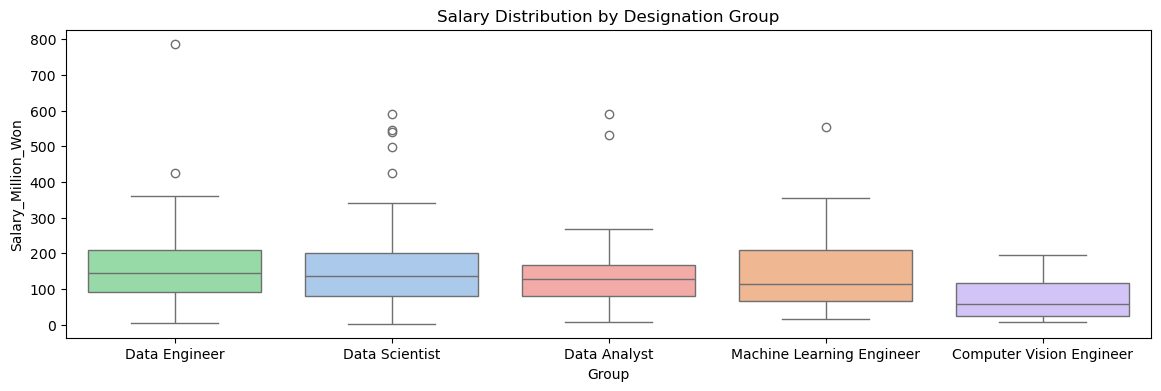

In [418]:
# boxplot 정렬을 위해 group을 salary의 median으로 sort
grouped = data.loc[:,['Group', 'Salary_Million_Won']].groupby(['Group']) \
                .median().sort_values(by='Salary_Million_Won', ascending=False)

# Designation Group에 따른 Salary 분포 확인
plt.figure(figsize=(14,4))
sns.boxplot(x=data['Group'], y=data['Salary_Million_Won'], 
            hue=data['Group'], order=grouped.index, palette='pastel')
plt.title('Salary Distribution by Designation Group')
plt.show()